<a href="https://colab.research.google.com/github/ishmam1234/titanic/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

# Specify the path to the text file in Google Drive
file_path = '/content/drive/My Drive/data/Models/predict_val.txt'



In [9]:
import pandas as pd
import numpy as np
import os

# Directory where your CSV files are located
csv_directory = '/content/drive/My Drive'
# Load CSV files into a dictionary
datasets = {}
soil_files = {
    "Coarse Sand": "CSV-C.csv",
    "Medium Coarse Sand": "MCa.csv",
    "Fine Sand": "Finei.csv"
    # "Sand Soil": "sand_soil.csv"
}

# Load each CSV file into the datasets dictionary
for soil_type, file_name in soil_files.items():
    file_path = os.path.join(csv_directory, file_name)
    datasets[soil_type] = pd.read_csv(file_path)

# Function to get water content
def get_water_content(soil_type, capacitance):
    # Check if soil type exists in datasets
    if soil_type not in datasets:
        return "Soil type not found in datasets."

    # Get the dataset for the specified soil type
    df = datasets[soil_type]

    # Find the row with the closest capacitance value
    closest_row = df.iloc[(np.abs(df["Capacitance "] - capacitance)).argmin()]

    # Return the water content
    return closest_row["Water Content"]

# Input from user
soil_type_input = input("Enter soil type (e.g., 'Coarse Sand', 'Medium Coarse Sand', 'Fine Sand'): ").strip()
capacitance_input = float(input("Enter capacitance value: "))

# Get water content
water_content = get_water_content(soil_type_input, capacitance_input)

# Output result
if isinstance(water_content, str):
    print(water_content)  # Error message if no match found
else:
    print(f"The water content for {soil_type_input} with capacitance {capacitance_input} is {water_content}%.")


Enter soil type (e.g., 'Coarse Sand', 'Medium Coarse Sand', 'Fine Sand'): Fine Sand
Enter capacitance value: 1280
The water content for Fine Sand with capacitance 1280.0 is 12.51221896%.


In [5]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# # Directory where your CSV files are located
# csv_directory = '/content/drive/My Drive'

# # Load CSV files into a dictionary
# datasets = {}
# soil_files = {
#     "Coarse Sand": "CSV-C.csv",
#     "Medium Coarse Sand": "MCa.csv",
#     "Fine Sand": "Finei.csv"
# }

# # Load each CSV file into the datasets dictionary
# for soil_type, file_name in soil_files.items():
#     file_path = os.path.join(csv_directory, file_name)
#     datasets[soil_type] = pd.read_csv(file_path)

# # Function to predict soil type based on capacitance
# def predict_soil_type(capacitance):
#     closest_soil_type = None
#     smallest_difference = float("inf")

#     for soil_type, df in datasets.items():
#         # Find the closest capacitance in the current dataset
#         closest_row = df.iloc[(np.abs(df["Capacitance "] - capacitance)).argmin()]
#         diff = np.abs(closest_row["Capacitance "] - capacitance)

#         # Update if this soil type is a closer match
#         if diff < smallest_difference:
#             smallest_difference = diff
#             closest_soil_type = soil_type

#     return closest_soil_type

# Test dataset for evaluation
test_data = [
    {"True Soil Type": "Coarse Sand", "Capacitance": 1.25},
    {"True Soil Type": "Medium Coarse Sand", "Capacitance": 2.10},
    {"True Soil Type": "Fine Sand", "Capacitance": 3.50},
    {"True Soil Type": "Coarse Sand", "Capacitance": 1.30},
    {"True Soil Type": "Fine Sand", "Capacitance": 3.60}
]

# Evaluate predictions
true_labels = []
predicted_labels = []

for sample in test_data:
    true_labels.append(sample["True Soil Type"])
    predicted_labels.append(predict_soil_type(sample["Capacitance "]))

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=soil_files.keys())

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=soil_files.keys())
disp.plot(cmap="Pastel1")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=soil_files.keys()))


NameError: name 'predict_soil_type' is not defined

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from the text file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract data for "Data of C Soil" and "Data of MC Soil"
c_soil_data = []
mc_soil_data = []
fr_soil_data = []
fp_soil_data = []
for line in lines:
    if line.startswith("Data of  C Soil:"):
        c_soil_data.append(line.strip().split(":")[1].strip().split(","))
    elif line.startswith("Data of MC Soil:"):
        mc_soil_data.append(line.strip().split(":")[1].strip().split(","))
    elif line.startswith("Data of fr Soil:"):
        fr_soil_data.append(line.strip().split(":")[1].strip().split(","))
    elif line.startswith("Data of fp Soil:"):
        fp_soil_data.append(line.strip().split(":")[1].strip().split(","))

# Convert data to numpy arrays
c_soil_data = np.array(c_soil_data, dtype=float)
mc_soil_data = np.array(mc_soil_data, dtype=float)
fr_soil_data = np.array(fr_soil_data, dtype=float)
fp_soil_data = np.array(fp_soil_data, dtype=float)

# Plot the data and connect the dots
water_content = [2, 4, 6, 8, 10, 12, 14, 16]
plt.plot(water_content, c_soil_data[0], color='blue', label='Data of  C Soil', marker='o')
plt.plot(water_content, mc_soil_data[0], color='yellow', label='Data of MC Soil', marker='o')
plt.plot(water_content, fr_soil_data[0], color='pink', label='Data of fr Soil', marker='o')
plt.plot(water_content, fp_soil_data[0], color='grey', label='Data of fp Soil', marker='o')

# Add labels and legend
plt.xlabel('Water Content')
plt.ylabel('Capacitance')
plt.legend()

# Show the plot
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
print("Unknown Soil Capacitances.")

unknown_capacitances = []
for i in range(len(water_content)):
    capacitance = input(f"For {water_content[i]}% water content: ")
    unknown_capacitances.append(float(capacitance))

Unknown Soil Capacitances.
For 2% water content: 2040
For 4% water content: 1798
For 6% water content: 1880
For 8% water content: 1490
For 10% water content: 1320
For 12% water content: 1300
For 14% water content: 1150
For 16% water content: 1125


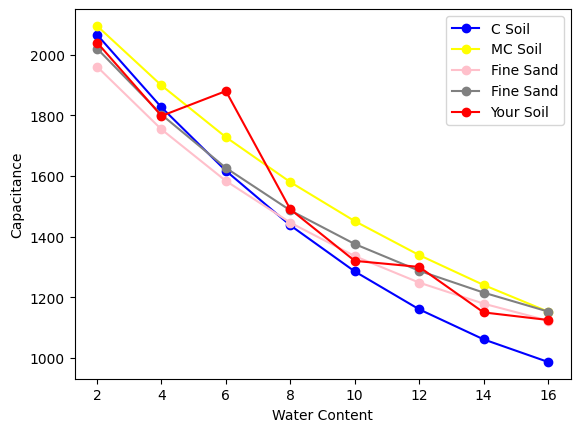

In [ ]:
# Plot the data and connect the dots
water_content = [2, 4, 6, 8, 10, 12, 14, 16]
plt.plot(water_content, c_soil_data[0], color='blue', label='C Soil', marker='o')
plt.plot(water_content, mc_soil_data[0], color='yellow', label='MC Soil', marker='o')
plt.plot(water_content, fr_soil_data[0], color='pink', label='Fine Sand', marker='o')
plt.plot(water_content, fp_soil_data[0], color='grey', label='Fine Sand', marker='o')
plt.plot(water_content, unknown_capacitances, color='red', label='Your Soil', marker='o')

# Add labels and legend
plt.xlabel('Water Content')
plt.ylabel('Capacitance')
plt.legend()

# Show the plot
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
file_path = '/content/drive/My Drive/data/Models/predict_val.txt'


In [ ]:
from IPython.display import Image, display

import numpy as np

# Calculate mean absolute difference for C Soil data
c_soil_mad = np.mean(np.abs(c_soil_data[0] - unknown_capacitances))

# Calculate mean absolute difference for MC Soil data
mc_soil_mad = np.mean(np.abs(mc_soil_data[0] - unknown_capacitances))


# Calculate mean absolute difference for MC Soil data
fp_soil_mad = np.mean(np.abs(fp_soil_data[0] - unknown_capacitances))
if c_soil_mad < mc_soil_mad and c_soil_mad < fp_soil_mad:
    print("Your soil is closer to Coarse Sand.\n Particle size range (1/2 mm-1 mm)\n Fineness modulus: 3.7-3.1\n Specific gravity:  2.60-2.70\n Bulk Density: > 1.80 g/cm³")
elif mc_soil_mad < c_soil_mad and mc_soil_mad < fp_soil_mad:
    print("Your soil is closer to Medium Coarse Soil.\n Particle size range (1/4 mm–1/2 mm)\n Fineness modulus: 3.0 - 2.3\n Specific gravity: 2.60-2.70\n Bulk Density:  <1.80 g/cm³")
elif fp_soil_mad < c_soil_mad and fp_soil_mad < mc_soil_mad:
    print("Your soil is closer to Fine Sand.\n Particle size range (1/8 mm – 1/4 mm)\n Fineness modulus: 2.2–1.6\n Specific gravity: 2.60–2.70\n Bulk Density: < 1.75 g/cm³")
else:
    print("Your soil has a similar mean absolute difference with multiple soil types.")
# Determine which soil the unknown soil is closer to based on MAD
#if c_soil_mad < mc_soil_mad &&  c_soil_mad > fp_soil_mad :
# if c_soil_mad < mc_soil_mad &&  c_soil_mad > fp_soil_mad
#     print("Your soil is closer to FP Soil.")
# elif c_soil_mad < mc_soil_mad && c_soil_mad < fp_soil_mad:
#     print("Your soil is closer to C Soil.")
# elif mc_soil_mad < c_soil_mad :
#         print("Your soil is closer to MC Soil.")
# else:
#     print("Your soil has similar mean absolute difference with both C Soil,MC Soil and Fine Sand.")
    #image_path = '/content/drive/My Drive/data/Images/C1.png'
    #display(Image(filename=image_path))
    # image_path = '/content/drive/My Drive/data/Images/C2.png'
    # display(Image(filename=image_path))
   # display(Image(filename='/content/drive/My Drive/data/Images/C1.png'))
# elif mc_soil_mad < c_soil_mad:
#     print("Your soil is closer to MC Soil.")
    # image_path = '/content/drive/My Drive/data/Images/MC1.png'
    # display(Image(filename=image_path))
    #display(Image(filename='/content/drive/My Drive/data/Images/MC1.png'))
# else:
#     print("Your soil has similar mean absolute difference with both C Soil and MC Soil.")


Your soil is closer to Fine Sand.
 Particle size range (1/8 mm – 1/4 mm)
 Fineness modulus: 2.2–1.6
 Specific gravity: 2.60–2.70
 Bulk Density: < 1.75 g/cm³


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

# Load the Excel file
file_path = 'THESIS MC AND C.xlsx'
xls = pd.ExcelFile(file_path)

# Display sheet names
print("Sheet names:", xls.sheet_names)

# Load data from the sheets containing soil characteristics
df_soil1 = pd.read_excel(xls, sheet_name=xls.sheet_names[0])
df_soil2 = pd.read_excel(xls, sheet_name=xls.sheet_names[1])

# Display first few rows of each dataframe
print("Soil Type 1 Data:")
print(df_soil1.head())
print("\nSoil Type 2 Data:")
print(df_soil2.head())

# Assuming we have a column named 'SoilType' to check for 'mc_soil'
soil_type_to_check = 'mc_soil'

if soil_type_to_check in df_soil1['SoilType'].values:
    print(f"{soil_type_to_check} found in Soil Type 1")
    display(Image(filename='ag.png'))
elif soil_type_to_check in df_soil2['SoilType'].values:
    print(f"{soil_type_to_check} found in Soil Type 2")
    display(Image(filename='ag.png'))
else:
    print(f"{soil_type_to_check} not found in any soil type")
    display(Image(filename='gradation_curve.png'))


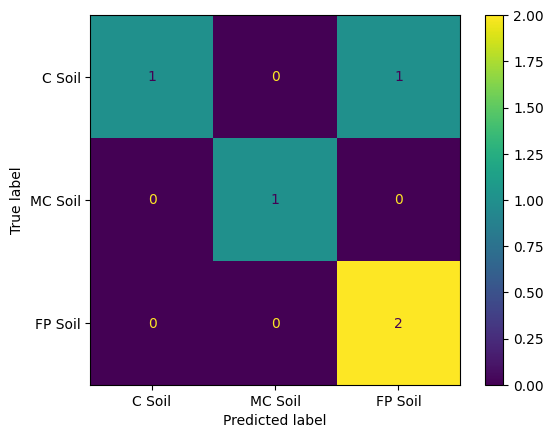

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Example data (true labels and predictions)
true_labels = ["C Soil", "MC Soil", "FP Soil", "C Soil", "FP Soil"]
predicted_labels = ["C Soil", "MC Soil", "FP Soil", "FP Soil", "FP Soil"]

# Compute confusion matrix
labels = ["C Soil", "MC Soil", "FP Soil"]
cm = confusion_matrix(true_labels, predicted_labels, labels=labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="viridis")


Classification Report:
                    precision    recall  f1-score   support

       Coarse Sand       1.00      0.50      0.67         2
Medium Coarse Sand       0.67      1.00      0.80         2
         Fine Sand       1.00      1.00      1.00         1

          accuracy                           0.80         5
         macro avg       0.89      0.83      0.82         5
      weighted avg       0.87      0.80      0.79         5



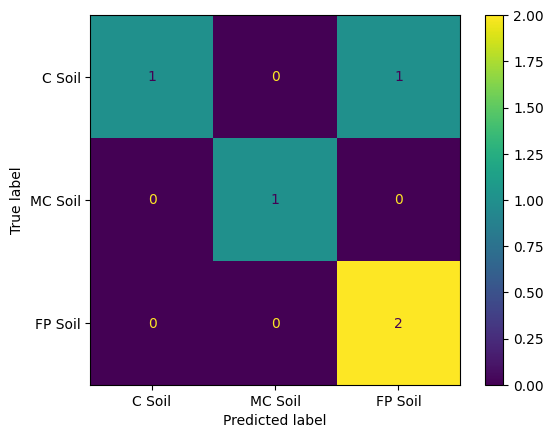

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Example data (true labels and predictions)
true_labels = ["C Soil", "MC Soil", "FP Soil", "C Soil", "FP Soil"]
predicted_labels = ["C Soil", "MC Soil", "FP Soil", "FP Soil", "FP Soil"]

# Compute confusion matrix
labels = ["C Soil", "MC Soil", "FP Soil"]
cm = confusion_matrix(true_labels, predicted_labels, labels=labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="viridis")

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=soil_files.keys()))